# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

Podriamos considerar que los datos que nos ayudarían a predecir el precio de venta serían, dimensiones, ubicación de la propiedad, estado del inmueble y precio.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
properati = pd.read_csv('/content/drive/MyDrive/Data Science/Proyecto 1/DS_Proyecto_01_Datos_Properati.csv')

In [44]:
properati.shape

(146660, 19)

In [45]:
properati.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [46]:
properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [47]:
properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [48]:
#Contamos la cantidad de instancias por tipos de propiedad
properati['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

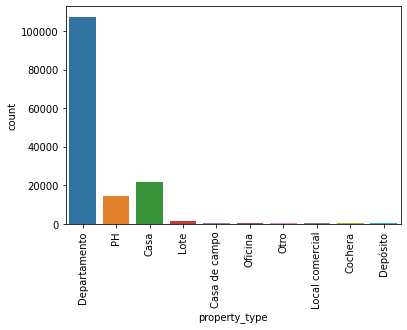

In [49]:
#Graficamos
sns.countplot(data = properati, x = 'property_type')
plt.xticks(rotation=90)

En el grafico se observa con claridad que, departamento, PH y casa son el tipo de propiedad que predomina nuestro dataset. 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

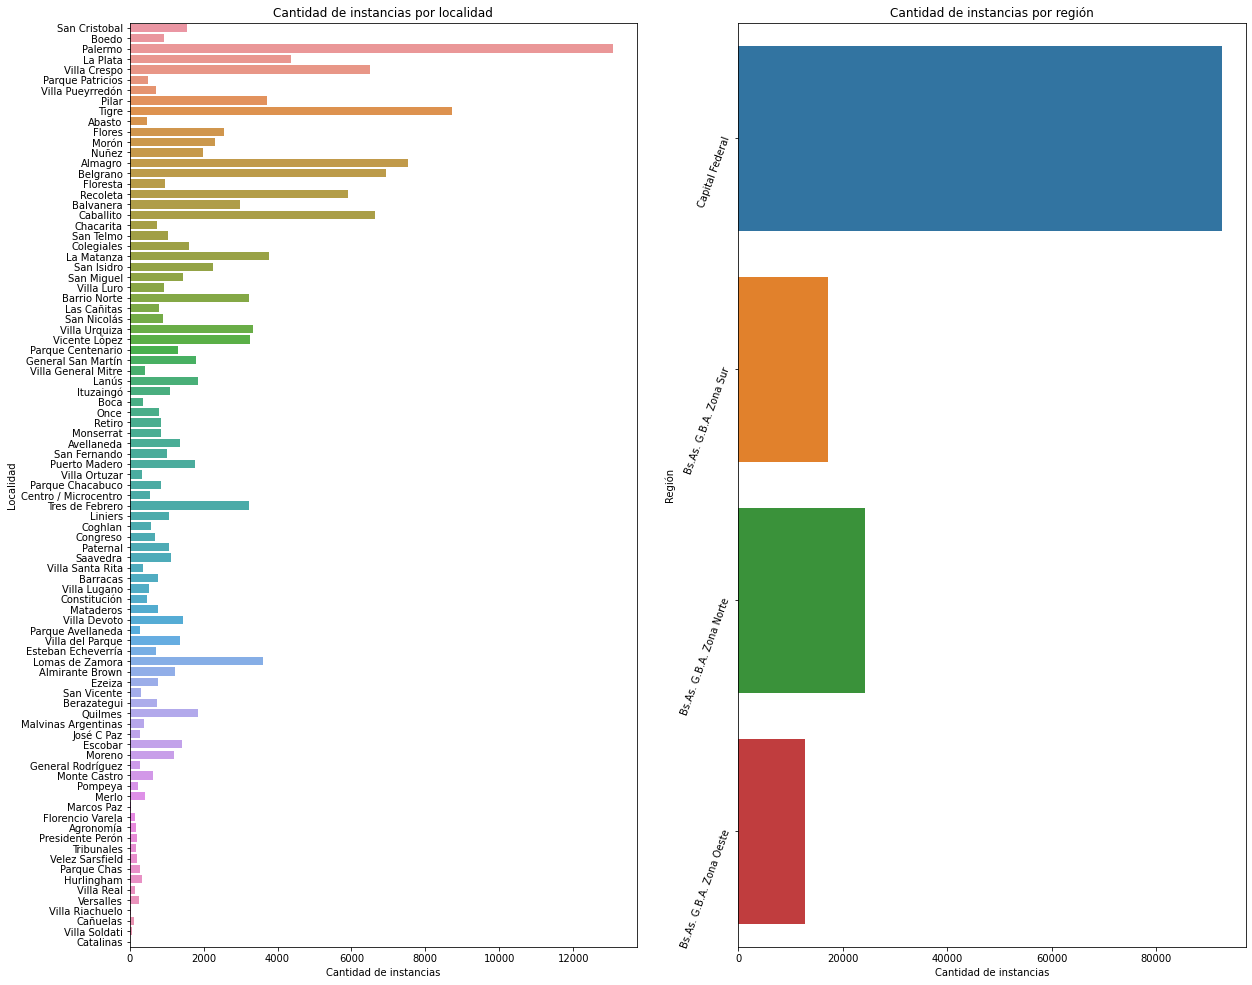

In [50]:
#Graficamos cantidad de instancias por localidad y región
plt.figure(figsize=(20,17))

plt.subplot(121) 
sns.countplot(data = properati, y = 'l3')
plt.title('Cantidad de instancias por localidad')
plt.xlabel('Cantidad de instancias')
plt.ylabel('Localidad')

plt.subplot(122)
sns.countplot(data = properati, y = 'l2')
plt.title('Cantidad de instancias por región')
plt.xlabel('Cantidad de instancias')
plt.ylabel('Región')
plt.yticks(rotation=70)

Capital federal cuenta con una gran proporcion de nuestros datos, por otro lado podemos observar la gran cantidad de barrios correspondientes a la misma que más adelante nos permitirá darle mayor información a nuestros modelos.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [51]:
#Filtramos por las tres clases de propiedad mas abundantes y la región con más propiedades.
properati = properati[(properati["l2"] == "Capital Federal") & (properati.property_type.isin(["Departamento", "Casa", "PH"]))]
properati.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

**Obtenemos estadísticos**
Podemos observar que hay maximos muy elevados y minimos muy pequeños para todos los features. 


In [52]:
#Eliminamos las columnas con las que no vamos a trabajar
properati = properati.drop(['lat', 'lon'], axis =1)

In [53]:
properati.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Visualización**
Graficamos para poder determinar rangos razonables.

Text(0.5, 0, 'Cantidad')

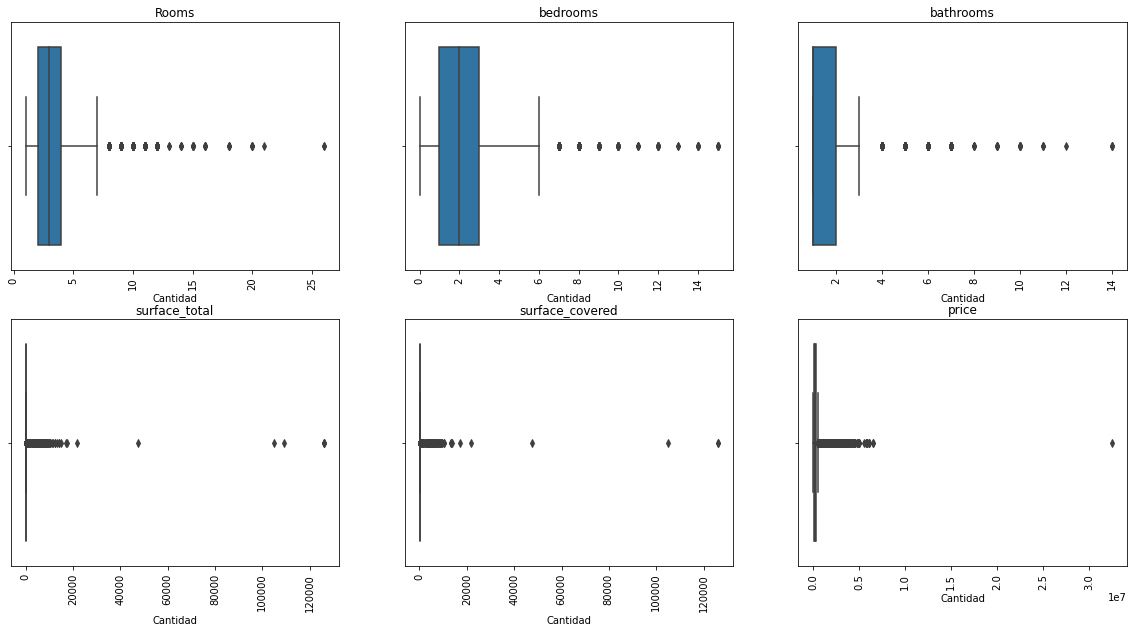

In [54]:
#Representación grafica para detectar outliers
plt.figure(figsize=(20,10))

plt.subplot(231) 
sns.boxplot(data = properati, x = 'rooms')
plt.xticks(rotation=90)
plt.title('Rooms')
plt.xlabel('Cantidad')

plt.subplot(232)
sns.boxplot(data = properati, x = 'bedrooms')
plt.xticks(rotation=90)
plt.title('bedrooms')
plt.xlabel('Cantidad')


plt.subplot(233)
sns.boxplot(data = properati, x = 'bathrooms')
plt.xticks(rotation=90)
plt.title('bathrooms')
plt.xlabel('Cantidad')


plt.subplot(234)
sns.boxplot(data = properati, x = 'surface_total')
plt.xticks(rotation=90)
plt.title('surface_total')
plt.xlabel('Cantidad')


plt.subplot(235)
sns.boxplot(data = properati, x = 'surface_covered')
plt.xticks(rotation=90)
plt.title('surface_covered')
plt.xlabel('Cantidad')


plt.subplot(236)
sns.boxplot(data = properati, x = 'price')
plt.xticks(rotation=90)
plt.title('price')
plt.xlabel('Cantidad')

Tanto en surface total, surface covered y price, no solo hay muchos valores atipicos (Fuera de los bigotes) sino que tambien la "caja" del boxplot es sumamente pequeña, eso quiere decir que los outliers estan fuertemente alejados del centro de los datos.

**Normalización**
Eliminamos valores atipicos y sin coherencia para poder obtener graficos comprensibles

In [55]:
#Eliminación de valores atipicos 
properati = properati.drop(properati[(properati['rooms'] > 7.0)].index)
properati = properati.drop(properati[(properati['bedrooms'] > 8.0)].index)
properati = properati.drop(properati[(properati['bathrooms'] > 4.0)].index)
properati = properati.drop(properati[(properati['surface_total'] < 30.000000)].index)
properati = properati.drop(properati[(properati['surface_total'] > 200.000000)].index)
properati = properati.drop(properati[(properati['surface_covered'] < 20.000000)].index)
properati = properati.drop(properati[(properati['surface_covered'] > 150.000000)].index)
properati = properati.drop(properati[(properati['price'] > 400000.0)].index)
#Eliminar instancias en las cuales la superficie cubierta sea mayor a la superficie total 
properati = properati.drop(properati[(properati['surface_covered'] > properati['surface_total'])].index)
properati.shape

(74900, 17)

In [56]:
#Descripción post eliminación de valores atipicos
properati.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74900.000000,74900.000000,72960.000000,66842.000000,66534.000000,74900.000000
mean,2.689506,1.739519,1.342612,71.811092,63.055866,177516.590988
std,0.992146,0.866856,0.577600,32.254728,26.033547,78751.896161
min,1.000000,0.000000,1.000000,30.000000,20.000000,7500.000000
25%,2.000000,1.000000,1.000000,47.000000,43.000000,117000.000000
50%,3.000000,2.000000,1.000000,64.000000,57.000000,160000.000000
75%,3.000000,2.000000,2.000000,88.000000,77.000000,225182.500000
max,7.000000,7.000000,4.000000,200.000000,150.000000,400000.000000


**Visualización**
Graficamos para corroborar la normalización de nuestros datos.

Text(0.5, 0, 'Cantidad')

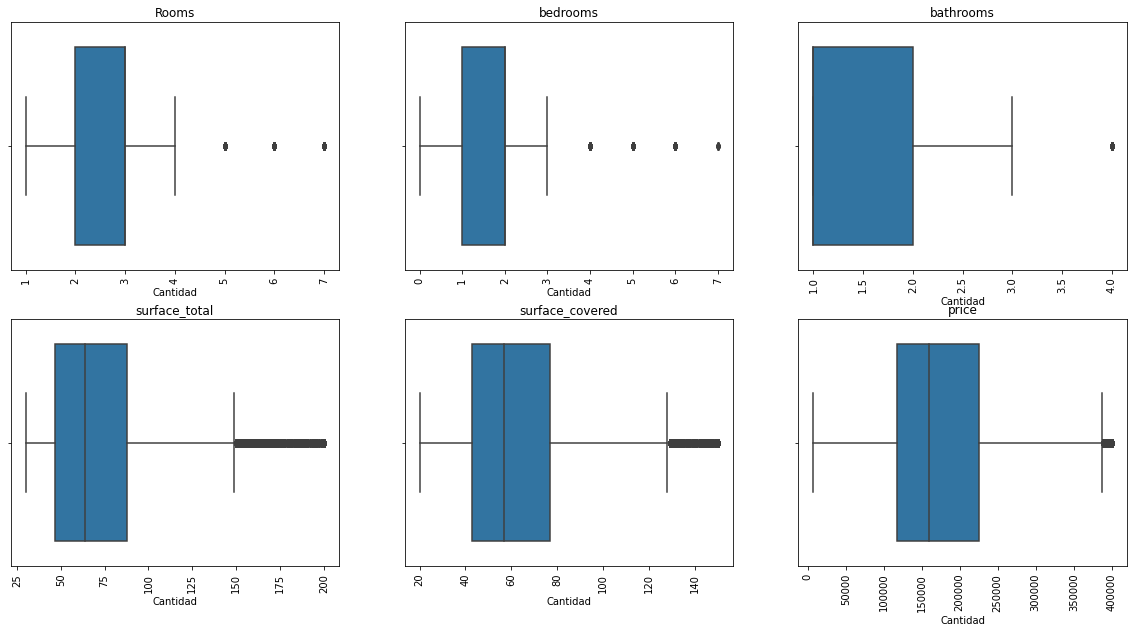

In [57]:
#Representación grafica post eliminación de valores atipicos
plt.figure(figsize=(20,10))

plt.subplot(231) 
sns.boxplot(data = properati, x = 'rooms')
plt.xticks(rotation=90)
plt.title('Rooms')
plt.xlabel('Cantidad')

plt.subplot(232)
sns.boxplot(data = properati, x = 'bedrooms')
plt.xticks(rotation=90)
plt.title('bedrooms')
plt.xlabel('Cantidad')


plt.subplot(233)
sns.boxplot(data = properati, x = 'bathrooms')
plt.xticks(rotation=90)
plt.title('bathrooms')
plt.xlabel('Cantidad')


plt.subplot(234)
sns.boxplot(data = properati, x = 'surface_total')
plt.xticks(rotation=90)
plt.title('surface_total')
plt.xlabel('Cantidad')


plt.subplot(235)
sns.boxplot(data = properati, x = 'surface_covered')
plt.xticks(rotation=90)
plt.title('surface_covered')
plt.xlabel('Cantidad')


plt.subplot(236)
sns.boxplot(data = properati, x = 'price')
plt.xticks(rotation=90)
plt.title('price')
plt.xlabel('Cantidad')

**Correlación** 
Utilizamos la función pairplot para estudiar las correlaciones.

<Figure size 504x360 with 0 Axes>

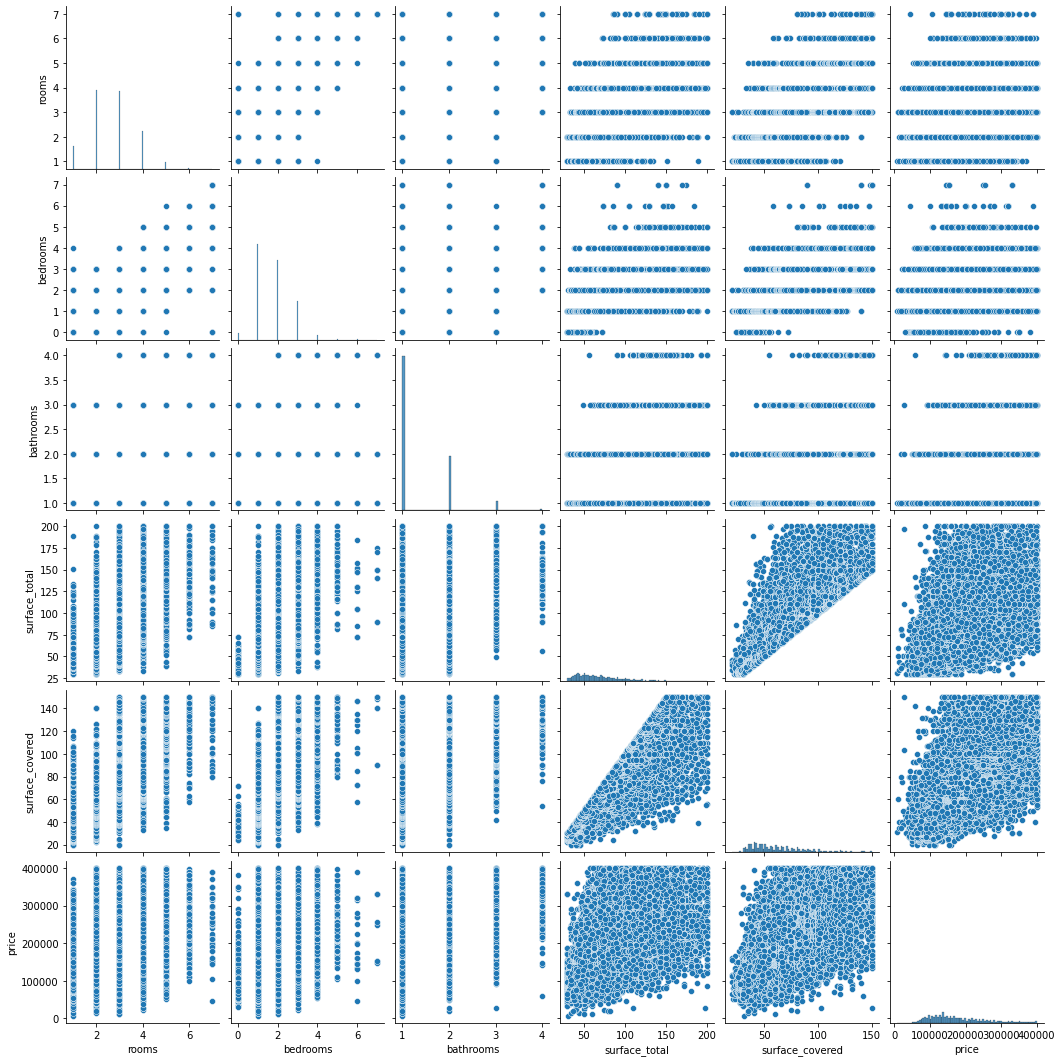

In [58]:
plt.figure(figsize=(7,5))
sns.pairplot(properati)

En este grafico distribución vemos que hay correlación entre surface total y surface covered.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [59]:
properati.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.943067,0.503905,0.730452,0.795902,0.586433
bedrooms,0.943067,1.000000,0.505831,0.720916,0.792510,0.573712
bathrooms,0.503905,0.505831,1.000000,0.552187,0.599556,0.584489
surface_total,0.730452,0.720916,0.552187,1.000000,0.905009,0.700077
surface_covered,0.795902,0.792510,0.599556,0.905009,1.000000,0.726725
price,0.586433,0.573712,0.584489,0.700077,0.726725,1.000000


Según las correlaciones las mejores variables para predecir el precio son superficie cubierta y la superfice total.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Una de las preguntas que podriamos hacernos sería ¿Cúal es el estrato socioeconomico de un determinado inmueble? para responderla deberiamos tener información sobre uno de los ultimos censos para obtener las principales características de las viviendas por zonas. Podriamos encontrarnos con un sesgo en los casos donde barrios de clase alta esten muy cerca de barrios de clase baja. 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**Normalización**

In [60]:
#Cargamos el dataset nuevamente
properati = pd.read_csv('/content/drive/MyDrive/Data Science/Proyecto 1/DS_Proyecto_01_Datos_Properati.csv')

In [61]:
#Visualizamos el dataset
properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [62]:
#Obtenemos el tamaño inicial
properati.shape

(146660, 19)

In [63]:
#Filtramos por región y tipo de propiedad con más instancias
properati = properati[(properati["l2"] == "Capital Federal") & (properati.property_type.isin(["Departamento", "Casa", "PH"]))]
properati.shape

(91485, 19)

In [64]:
#Filtramos por los atrubutos con las que vamos a trabajar
properati =  properati[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
properati.shape

(91485, 6)

In [65]:
#Eliminamos valores faltantes
properati = properati.dropna()
properati.shape

(81210, 6)

In [66]:
#Determinamos los rangos de algunos atributos
properati = properati.drop(properati[(properati['surface_total'] < 15.000000)].index)
properati = properati.drop(properati[(properati['surface_total'] > 1000.000000)].index)
properati = properati.drop(properati[(properati['price'] >  4000000.0)].index)
properati.shape

(81019, 6)

**Creación de modelos**

Utilizaremos como metrica de evaluación RMSE ya que hay bastante atipicidad en los datos, al ser cuadratica las diferencias se elevaran y vamos a poder visualizarlas mejor.

In [67]:
#Seleccionamos las variables predictoras (X) y la variable a predecir (y)
X = properati.drop("price", axis=1)
y = properati.price

In [68]:
#Realizamos un Train/Test split de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


**Caso Benchmark**

Utilizamos el promedio del precio 

In [69]:
n = len(y_test)
y_mean =  y_train.mean()
y_test_pred = []
for i in range(n):
    y_test_pred.append(y_mean)

print(y_test_pred)

[263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325921746, 263667.2325

In [70]:
from sklearn.metrics import mean_squared_error
rmse_test_benchmark = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test_benchmark

302293.5784366929

Este valor es el error de nuestro modelo de referencia, valor que se desea disminuir para lo cual se proponen los modelos de arboles de decisión y vecinos más cercanos. Los siguintes pasos estarán orientados a determinar el mejor modelo que permita disminuir el error y nos permita estimar el con mayor precisión el precio de las propiedades. 

**Creación de modelos de los modelos y entrenamiento**



In [71]:
#Creamos los modelos 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [72]:
#Entrenamos
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**Evaluación**

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


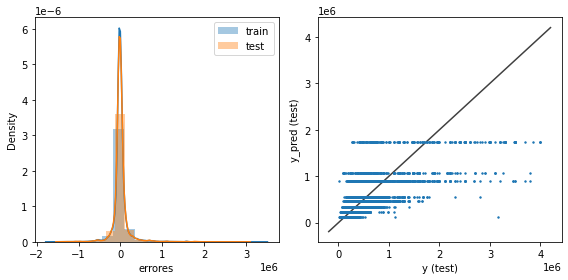

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


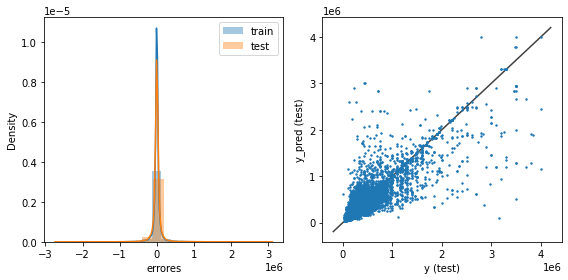

In [73]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

#Creamos un for para conocer y visualizar el error de cada uno de los modelos en train y test
for i, model in enumerate([tree_regressor, knn_regressor]):

#Predecimos tanto para train como para test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
#Imprimimos el nombre del modelo
    print(f'Modelo: {modelos[i]}')

#Calculamos el RMSE para train, test y los imprimimos en cadena
#Primero utilizamos la funcion mean_squared_error y a eso le sacamos la raiz cuadrada para obtener el RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#Imprimimos el RMSE para test y train
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

#Creamos los graficos comparando el error entre test y train 
    
    plt.figure(figsize = (8,4))

#En la primer instancia del subplot creamos un grafico de distribución para apreciar la diferencia de errores entre train y test
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

#En la segunda instancia del subplot creamos un grafico para comparar las variables pronosticadas con el valor real
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

#Determinamos los limites minimos y maximos de cada eje   
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), 
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Podemos visualizar en los histogramas que los errores se centran en cero y en el grafico de dispersión vemos que hay varios puntos que tienen un error bastante alto. 

**Mejoramos el desempeño de los modelos**

Optimizamos KNeighborsRegressor probando diferentes números de vecinos.

In [74]:
# Definimos las listas vacias para los valores RMSE
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un for sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definimos el modelo con el valor de vecinos deseado
    kvc = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenamos el modelo
    kvc.fit(X_train, y_train)
    
    # Predecimos y calculamos el RMSE sobre train
    y_train_pred = kvc.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecimos y calculamos el RMSE sobre test
    y_test_pred = kvc.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregamos la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

**Visualización**: grafico del error para cada número de vecinos.

Text(0, 0.5, 'RMSE')

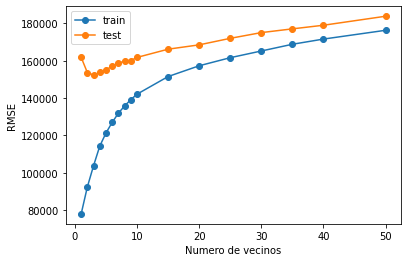

In [75]:
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Numero de vecinos')
plt.ylabel('RMSE')

Nuestro mejor error se logra con 3 como cantidad de vecinos.

In [76]:
# Definimos el modelo con el valor de vecinos obtenido en el grafico anterior 
kvc = KNeighborsRegressor(n_neighbors= 3)
    
# Entrenamos el modelo
kvc.fit(X_train, y_train)
    
# Predecimos y calculamos el RMSE sobre train
y_train_pred = kvc.predict(X_train)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
# Predecimos y calculamos el RMSE sobre test
y_test_pred = kvc.predict(X_test)
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Raíz del error cuadrático medio en Train:', rmse_train_knn)
print('Raíz del error cuadrático medio en Test:', rmse_test_knn)

Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


Optimización del DecisionTreeRegressor probando diferentes profundidades del arbol. 

In [77]:
# Definimos las listas vacias para los valores de RMSE
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,20,30]

# Generamos un for que realice lo siguiente sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Definir el modelo con el valor de profundidad deseado
    tree = DecisionTreeRegressor(max_depth= max_depth )
    
    # Entrenar el modelo
    tree.fit(X_train, y_train)
    
    # Predecir y calcular el RMSE para train
    y_train_pred = tree.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y calcular el RMSE para test
    y_test_pred = tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

**Visualización**: grafico del error para las diferentes profundidades del árbol.

Text(0, 0.5, 'Exactitud')

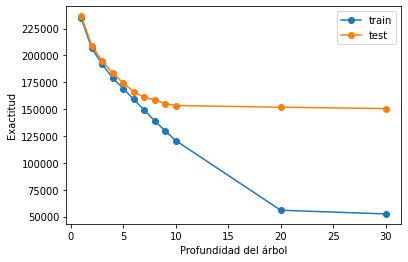

In [78]:
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

A partir del grafico anterior podemos notar que la mejor profundidad del arbol es de 10 nodos, ya que luego de esa cantidad la mejora del error es muy pequeña y tenderiamos a sobreajustar nuestro modelo. 

In [79]:
tree = DecisionTreeRegressor(max_depth = 10, random_state = 42 )
    
# Entrenamos el modelo
tree.fit(X_train, y_train)
    
# Predecimos y calculamos el RMSE para train
y_train_pred = tree.predict(X_train)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
# Predecimos y evaluamos el RMSE para test
y_test_pred = tree.predict(X_test)
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Raíz del error cuadrático medio en Train:', rmse_train_tree)
print('Raíz del error cuadrático medio en Test:', rmse_test_tree)
    

Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152950.67757423845


In [80]:
print('RMSE Benchmark', rmse_test_benchmark)
print('RMSE Decision Tree Regressor en test', rmse_test_tree)
print('RMSE K Neighbors Regressor en test', rmse_test_knn)

RMSE Benchmark 302293.5784366929
RMSE Decision Tree Regressor en test 152950.67757423845
RMSE K Neighbors Regressor en test 152317.82229037234


**Conclusión**

Podemos observar que el modelo KNN es el que nos brinda un error bajo en comparación del arbol de decisión. En base a esto podemos sugerir que es el más conveniente para operar con este conjunto de datos.
Podria resultar relevante para predecir el precio de un inmueble la antiguedad del mismo y quizas descartar la información de dormitorios, ya que esta altamente correlacionado con la cantidad de habitaciones. 
Uno de los puntos a mejorar habiendo probado diferentes tipos de algoritmos seria la incorporación de optimización de hiperparametros en cada uno de ellos. 